# UVA-ARC-Alaska sandbox

## First step: loading dependencies and helper functions

In [156]:
#
# When running for the first time, install dependencies:
#!pip install numpy matplotlib pandas seaborn h5pyd
#
# Then, load the required modules
#
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import datetime
import h5pyd
import time

In [157]:
#
# Settings for plotting graphs
#
%matplotlib inline
#
# Determine graph size
sns.set(rc={'figure.figsize':(18, 8)})

In [158]:
#
# Load the datastore from HSDS:
# All the data generated up until now from the sensor net in Alaska
#
filepath = "hdf5://home/uva-arc-alaska.h5"

In [159]:
#
# Open HSDS datastore as 'f'
#
# Please note:
# Set use_cache to False to pick up any real-time changes
# This is useful if the analyst wants to include latest data batch
#
f = h5pyd.File(filepath, mode='r', use_cache=True)

In [160]:
#
# Useful functions:
# Show HDF5 attributes
#
# You can just load this box w/ SHIFT+ENTER and move on
# These functions will be used later to convert between formats
# 
def read_attrs(obj):
    for k in obj.attrs:
        v = obj.attrs[k]
        print(f"{k}: {v}")
        
#
# Convert timestamp (ts) in seconds to a date-time string
# Note: in the database, all datetime is stored in seconds 
#
def ts_to_str(ts):
    value = datetime.datetime.fromtimestamp(ts)
    s = value.isoformat(sep=' ', timespec='seconds')
    return s

#
# Convert np bytestring values to string
# to make things easier when working with dataframes
# 
def convert_bytestr_to_str(df):
    df_converted = df
    for col, dtype in df.dtypes.items():
        if dtype == object:
            df[col] = df[col].str.decode('utf-8')
    return df_converted

## Loggers table

In [161]:
#
# Read loggers / stations
#
loggers = f["loggers"]

#
# Display logger name, number, and last time they were updated
#
for i in range(loggers.nrows):
    row = loggers[i]
    logger_name = row['name'].decode('utf-8')
    logger_sn = row['sn'].decode('utf-8')
    last_query_ts = row['last_query']
    last_query_datestr = ts_to_str(last_query_ts)
    print(f"name: {logger_name}, logger number: {logger_sn}, last time updated: {last_query_datestr}")

# 
# Create a varible w/ logger names to use in this notebook:
# So we can avoid having to call stations / loggers by serial number
#
TNHA_B01 = loggers[0]['sn']
BUECI_B01 = loggers[1]['sn']
SSMH_B01 = loggers[2]['sn']
BEO_B01 = loggers[3]['sn']
TNHA_B01 = loggers[4]['sn']
SSMH_B01 = loggers[5]['sn']

name: TNHA-B01, logger number: 21198259, last time updated: 2022-07-04 18:08:19
name: BUECI-B01, logger number: 21401800, last time updated: 2022-07-04 18:08:20
name: SSMH-B01, logger number: 21401801, last time updated: 2022-07-04 18:08:36
name: BEO-B01, logger number: 21401802, last time updated: 2022-07-04 18:08:37
name: TNHA-B01, logger number: 21401799, last time updated: 2022-07-04 18:08:37
name: SSMH-B01, logger number: 21401803, last time updated: 2022-07-04 18:08:38


In [162]:
#
# Display logger name in Iñupiaq and location, GPS coordinates
# 
for i in range(loggers.nrows):
    # read database row w/ individual logger info
    row = loggers[i]
    #
    # Read individual fields per row of the db
    #
    # Note: Always use .decode('utf-8') for text...
    # because values are saved in binary, not text
    # to speed things up!
    #
    logger_ipk_name = row['name_ipk'].decode('utf-8')
    logger_address = row['location_en'].decode('utf-8')
    logger_address_ipk = row['location_ipk'].decode('utf-8')
    gps_lat = row['lat']
    gps_lon = row['lon']

    # Generate pretty output:
    print(f"Name in Iñupiaq: {logger_ipk_name}\n"        
          f"Address: {logger_address}\n"                 
          f"Address in Iñupiaq: {logger_address_ipk}\n"  
          f"Lat: {gps_lat}\n"                            
          f"Long: {gps_lon}\n")

Name in Iñupiaq: TNHA-B01
Address: TNHA-Base
Address in Iñupiaq: TNHA-Base
Lat: 71.2905044555664
Long: -156.76400756835938

Name in Iñupiaq: BUECI-B01
Address: BUECI-Base
Address in Iñupiaq: BUECI-Base
Lat: 71.29764556884766
Long: -156.7281036376953

Name in Iñupiaq: SSMH-B01
Address: SSMH-Base
Address in Iñupiaq: SSMH-Base
Lat: 71.30673217773438
Long: -156.72972106933594

Name in Iñupiaq: BEO-B01
Address: BEO-Base
Address in Iñupiaq: BEO-Base
Lat: 71.2756118774414
Long: -156.6415557861328

Name in Iñupiaq: TNHA-B01
Address: TNHA-Base
Address in Iñupiaq: TNHA-Base
Lat: 71.2905044555664
Long: -156.76400756835938

Name in Iñupiaq: SSMH-B01
Address: SSMH-Base
Address in Iñupiaq: SSMH-Base
Lat: 71.30673217773438
Long: -156.72972106933594



In [163]:
#
# OK, this is fun, but not particularly useful...
# How about having it all organized in a tabular form?
# It only takes a few lines!
#
# First read the loggers database from the HDF store
#
loggers = f['loggers']

#
# Then, convert the database into an array...
# so it can be converted finally to a dataframe:
#
arr = loggers.value
df = pd.DataFrame(arr)
for col, dtype in df.dtypes.items():
    if dtype == object:
       df[col] = df[col].str.decode('utf-8')

# Now we can display the DF in its full glory:
df_loggers = df
df_loggers

sn  schema_version  active       name   name_ipk            model  \
0  21198259             0.1       1   TNHA-B01   TNHA-B01  HOBOLink RX3000   
1  21401800             0.1       1  BUECI-B01  BUECI-B01  HOBOLink RX3000   
2  21401801             0.1       1   SSMH-B01   SSMH-B01  HOBOLink RX3000   
3  21401802             0.1       1    BEO-B01    BEO-B01  HOBOLink RX3000   
4  21401799             0.1       1   TNHA-B01   TNHA-B01  HOBOLink RX3000   
5  21401803             0.1       1   SSMH-B01   SSMH-B01  HOBOLink RX3000   

  location_en location_ipk        lat      lat_units         lon  \
0   TNHA-Base    TNHA-Base  71.290504  degrees_north -156.764008   
1  BUECI-Base   BUECI-Base  71.297646  degrees_north -156.728104   
2   SSMH-Base    SSMH-Base  71.306732  degrees_north -156.729721   
3    BEO-Base     BEO-Base  71.275612  degrees_north -156.641556   
4   TNHA-Base    TNHA-Base  71.290504  degrees_north -156.764008   
5   SSMH-Base    SSMH-Base  71.306732  degrees_north -156.729721   

      lon_units  height height_units  altitude altitude_units  \
0  degrees_east     0.0            m       6.0              m   
1  degrees_east     0.0            m       0.0              m   
2  degrees_east     0.0            m       0.0              m   
3  degrees_east     0.0            m       0.0              m   
4  degrees_east     0.0            m       6.0              m   
5  degrees_east     0.0            m       0.0              m   

   battery_level_max  battery_level_min battery_units  last_query  
0                4.2                3.0             V  1656972499  
1                4.2                3.0             V  1656972500  
2                4.2                3.0             V  1656972516  
3                4.2                3.0             V  1656972517  
4                4.2                3.0             V  1656972517  
5                4.2                3.0             V  1656972518

## Sensors table

In [164]:
#
# First, read the sensors database from the HDF store
#
sensors = f['sensors']

# Then, convert the database into an array...
# so it can be converted finally to a dataframe:
arr = sensors.value
df = pd.DataFrame(arr)

#
# Now we can display the DF in its full glory
# But not so glorious... we only have 4 registered sensors
# 
# Note: we need to convert the numpy.bytestrings to str
#
df_sensors = convert_bytestr_to_str(df)
df_sensors

sn sn_logger  schema_version  active          long_name  \
0  21143416-1  21198259             0.1       1               Rain   
1  21187247-1  21198259             0.1       1        Temperature   
2  21187247-2  21198259             0.1       1  Relative Humidity   
3  21187247-3  21198259             0.1       1          Dew Point   

                  standard_name         sensor_type        model        lat  \
0  thickness_of_rainfall_amount      Tipping bucket   S-RGA-M002  71.290504   
1               air_temperature  temperature sensor  RXW-THC-900  71.290504   
2             relative_humidity            Humidity  RXW-THC-900  71.290504   
3                     dew_point  temperature sensor  RXW-THC-900  71.290504   

       lat_units  ...  battery_units                  accuracy  resolution  \
0  degrees_north  ...              v      ±1.0% at up to 20 mm    0.254 mm   
1  degrees_north  ...              v  ±0.25°C from -40° to 0°C      0.02°C   
2  degrees_north  ...              v                     ±2.5%       0.01%   
3  degrees_north  ...              v  ±0.25°C from -40° to 0°C      0.02°C   

          drift                                          datasheet  \
0           n/a     https://www.onsetcomp.com/datasheet/S-RGA-M002   
1       <0.01°C  https://www.onsetcomp.com/files/manual_pdfs/22...   
2  <1% per year  https://www.onsetcomp.com/files/manual_pdfs/22...   
3       <0.01°C  https://www.onsetcomp.com/files/manual_pdfs/22...   

  measurement_type  measurement_min measurement_max measurement_units  \
0             Rain              0.0            10.0                cm   
1      Temperature            -40.0            75.0                 C   
2               RH              0.0           100.0                 %   
3      Temperature            -40.0            75.0                 C   

  missing_values  
0         -999.9  
1         -999.9  
2         -999.9  
3         -999.9  

[4 rows x 34 columns]

In [193]:
#
# OK, let's list all the sensors per station
# But first... remember the list of stations / loggers?
# We created names without "-" because Python interprets it as math operator
# 
# List:
# TNHA_B01
# BUECI_B01
# SSMH_B01
# BEO_B01
# TNHA_B01
# SSMH_B01
# 
# We just have 4 sensors registered thus far, so not much to see here
# ... until metadata is registered
# 
df_result = df_sensors.loc[(df_sensors['sn_logger'] == '21198259')]
df_result = pd.concat([df_result['sn'], df_result['long_name'], df_result['standard_name']], axis=1)
df_result

sn          long_name                 standard_name
0  21143416-1               Rain  thickness_of_rainfall_amount
1  21187247-1        Temperature               air_temperature
2  21187247-2  Relative Humidity             relative_humidity
3  21187247-3          Dew Point                     dew_point

In [196]:
# 
# What if we want all the sensors of one type, for just one station?
# Here is an example: create table for all the 'air temperature' for TNHA_B01
#
# Please note that we just have 1 registered thus far... so, the list has just 1 item!
#
df_result = df_sensors.loc[(df_sensors['sn_logger'] == '21198259') 
                           & (df_sensors['standard_name'] == 'thickness_of_rainfall_amount')] 

sensors_temp = df_result['sn'].values
print(sensors_temp)

['21143416-1']


## Data table

In [179]:
# 
# Reading sensor data
# Now that we can get all the relevant info about the stations + sensors
# First, let's read the dataset and pass to a variable called 'data'
# 
data_table = f['data']

# Let's see the dimensions of the dataset
# UVA-ARC-Alaska has 54736 data points as of today
data_table

<HDF5 dataset "data": shape (54736,), type "|V48">

In [180]:
#
# Now, we need to convert from numpy array to Pandas dataframe
# That is much easier to manipulate, plot, etc.
#
# Note:
# Using "%time" before any instruction tells us the time spent
# In this case, 2 seconds to read the table w/ 22.5M datapoints
# and organize it into a Pandas dataframe, not too bad...
# 
arr = data_table.value
df = pd.DataFrame(arr)
df

logger_sn       sensor_sn  data_type_id  measurement_type  \
0      b'21198259'   b'21143416-1'             1                 5   
1      b'21198259'   b'21167037-1'             1                 8   
2      b'21198259'   b'21176452-1'             1                 4   
3      b'21198259'   b'21176526-1'             1                 3   
4      b'21198259'   b'21176861-1'             1                 9   
...            ...             ...           ...               ...   
54731  b'21401803'  b'21393048-16'             1                 1   
54732  b'21401803'   b'21393048-4'             1                 7   
54733  b'21401803'   b'21393048-7'             1                 1   
54734  b'21401803'   b'21401803-B'             1                11   
54735  b'21401803'   b'21401803-B'             1                11   

          si_value   timestamp  
0         0.000000  1656648000  
1       315.882353  1656648000  
2      1015.949979  1656648000  
3       623.125000  1656648000  
4         0.000000  1656648000  
...            ...         ...  
54731    -1.000000  1656984600  
54732     0.020000  1656984600  
54733     7.000000  1656984600  
54734     4.302322  1656984900  
54735     4.299317  1656985200  

[54736 rows x 6 columns]

In [181]:
#
# Look into the dataframe, just the first 10 lines!
# This operation is aesthetic and takes a bit of time,
# because it traverses the df to convert the strings...
# each bytestr (from numpy format) into regular Python str
#
# Aesthetics matters... for the modic wait of 18 seconds
# 
df = convert_bytestr_to_str(df)
df

logger_sn    sensor_sn  data_type_id  measurement_type     si_value  \
0      21198259   21143416-1             1                 5     0.000000   
1      21198259   21167037-1             1                 8   315.882353   
2      21198259   21176452-1             1                 4  1015.949979   
3      21198259   21176526-1             1                 3   623.125000   
4      21198259   21176861-1             1                 9     0.000000   
...         ...          ...           ...               ...          ...   
54731  21401803  21393048-16             1                 1    -1.000000   
54732  21401803   21393048-4             1                 7     0.020000   
54733  21401803   21393048-7             1                 1     7.000000   
54734  21401803   21401803-B             1                11     4.302322   
54735  21401803   21401803-B             1                11     4.299317   

        timestamp  
0      1656648000  
1      1656648000  
2      1656648000  
3      1656648000  
4      1656648000  
...           ...  
54731  1656984600  
54732  1656984600  
54733  1656984600  
54734  1656984900  
54735  1656985200  

[54736 rows x 6 columns]

## Timestamp conversion

In [182]:
%%time
#
# Convert the time coordinate (in seconds, Unix epoch) to datetime
# Now we can work happily with normal date-time, not seconds:
# Computationally intensive, takes 13 seconds
#
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
df = df.set_index('timestamp')
df

CPU times: user 5.68 ms, sys: 0 ns, total: 5.68 ms
Wall time: 5.23 ms


logger_sn    sensor_sn  data_type_id  \
timestamp                                                        
2022-07-01 04:00:00+00:00  21198259   21143416-1             1   
2022-07-01 04:00:00+00:00  21198259   21167037-1             1   
2022-07-01 04:00:00+00:00  21198259   21176452-1             1   
2022-07-01 04:00:00+00:00  21198259   21176526-1             1   
2022-07-01 04:00:00+00:00  21198259   21176861-1             1   
...                             ...          ...           ...   
2022-07-05 01:30:00+00:00  21401803  21393048-16             1   
2022-07-05 01:30:00+00:00  21401803   21393048-4             1   
2022-07-05 01:30:00+00:00  21401803   21393048-7             1   
2022-07-05 01:35:00+00:00  21401803   21401803-B             1   
2022-07-05 01:40:00+00:00  21401803   21401803-B             1   

                           measurement_type     si_value  
timestamp                                                 
2022-07-01 04:00:00+00:00                 5     0.000000  
2022-07-01 04:00:00+00:00                 8   315.882353  
2022-07-01 04:00:00+00:00                 4  1015.949979  
2022-07-01 04:00:00+00:00                 3   623.125000  
2022-07-01 04:00:00+00:00                 9     0.000000  
...                                     ...          ...  
2022-07-05 01:30:00+00:00                 1    -1.000000  
2022-07-05 01:30:00+00:00                 7     0.020000  
2022-07-05 01:30:00+00:00                 1     7.000000  
2022-07-05 01:35:00+00:00                11     4.302322  
2022-07-05 01:40:00+00:00                11     4.299317  

[54736 rows x 5 columns]

In [183]:
#
# Slice the dataframe as needed: for instance:
# By specifying the time interval (in UTC)
# 
# Let's start with the first day in the UVA-ARC dataset:
# July 1, 2022 --> until --> July 4th, 2022
# We can include hour:minute:second precision, if needed
# 
df_time_interval = df.loc['2022-07-01 00:00:00':'2022-07-04 00:00:00']
df_time_interval

/tmp/ipykernel_1377533/3210278182.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_time_interval = df.loc['2022-07-01 00:00:00':'2022-07-04 00:00:00']


logger_sn   sensor_sn  data_type_id  \
timestamp                                                       
2022-07-01 04:00:00+00:00  21198259  21143416-1             1   
2022-07-01 04:00:00+00:00  21198259  21167037-1             1   
2022-07-01 04:00:00+00:00  21198259  21176452-1             1   
2022-07-01 04:00:00+00:00  21198259  21176526-1             1   
2022-07-01 04:00:00+00:00  21198259  21176861-1             1   
...                             ...         ...           ...   
2022-07-04 00:00:00+00:00  21401799  21350917-2             1   
2022-07-04 00:00:00+00:00  21401799  21390414-1             1   
2022-07-04 00:00:00+00:00  21401799  21397542-1             1   
2022-07-04 00:00:00+00:00  21401799  21397542-2             1   
2022-07-04 00:00:00+00:00  21401799  21397542-3             1   

                           measurement_type     si_value  
timestamp                                                 
2022-07-01 04:00:00+00:00                 5     0.000000  
2022-07-01 04:00:00+00:00                 8   315.882353  
2022-07-01 04:00:00+00:00                 4  1015.949979  
2022-07-01 04:00:00+00:00                 3   623.125000  
2022-07-01 04:00:00+00:00                 9     0.000000  
...                                     ...          ...  
2022-07-04 00:00:00+00:00                10     0.000000  
2022-07-04 00:00:00+00:00                 3     0.625000  
2022-07-04 00:00:00+00:00                 1    22.298047  
2022-07-04 00:00:00+00:00                 2    27.809567  
2022-07-04 00:00:00+00:00                 6     2.829993  

[34095 rows x 5 columns]

In [204]:
%%time
#
# We may want to select 'temp' sensors in this time slice
# Let's select the slice with the .isin() method
#
df_temp = df_time_interval.loc[df_time_interval['sensor_sn'].isin(['21398666-1'])]
df_temp

CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 1.26 ms


logger_sn   sensor_sn  data_type_id  \
timestamp                                                       
2022-07-01 04:00:00+00:00  21198259  21398666-1             1   
2022-07-01 04:30:00+00:00  21198259  21398666-1             1   
2022-07-01 05:00:00+00:00  21198259  21398666-1             1   
2022-07-01 05:30:00+00:00  21198259  21398666-1             1   
2022-07-01 06:00:00+00:00  21198259  21398666-1             1   
...                             ...         ...           ...   
2022-07-03 22:00:00+00:00  21198259  21398666-1             1   
2022-07-03 22:30:00+00:00  21198259  21398666-1             1   
2022-07-03 23:00:00+00:00  21198259  21398666-1             1   
2022-07-03 23:30:00+00:00  21198259  21398666-1             1   
2022-07-04 00:00:00+00:00  21198259  21398666-1             1   

                           measurement_type   si_value  
timestamp                                               
2022-07-01 04:00:00+00:00                 1  10.550723  
2022-07-01 04:30:00+00:00                 1   8.491504  
2022-07-01 05:00:00+00:00                 1   7.762197  
2022-07-01 05:30:00+00:00                 1   7.697847  
2022-07-01 06:00:00+00:00                 1   8.277002  
...                                     ...        ...  
2022-07-03 22:00:00+00:00                 1   4.029863  
2022-07-03 22:30:00+00:00                 1   4.201465  
2022-07-03 23:00:00+00:00                 1   5.038022  
2022-07-03 23:30:00+00:00                 1   5.896030  
2022-07-04 00:00:00+00:00                 1   7.225942  

[137 rows x 5 columns]

In [209]:
#
# This is all good, but HOBO provides time stamps in a non-monotonic manner
# We need to organize the timestamp index and resample according to our needs
# In this case: we are resampling for every hour (taking the mean of the sensors)

df_temp.reset_index(inplace=True)
#df_resampled = df_oct_hum_sense.resample('60min').mean()

<AxesSubplot:xlabel='timestamp', ylabel='si_value'>

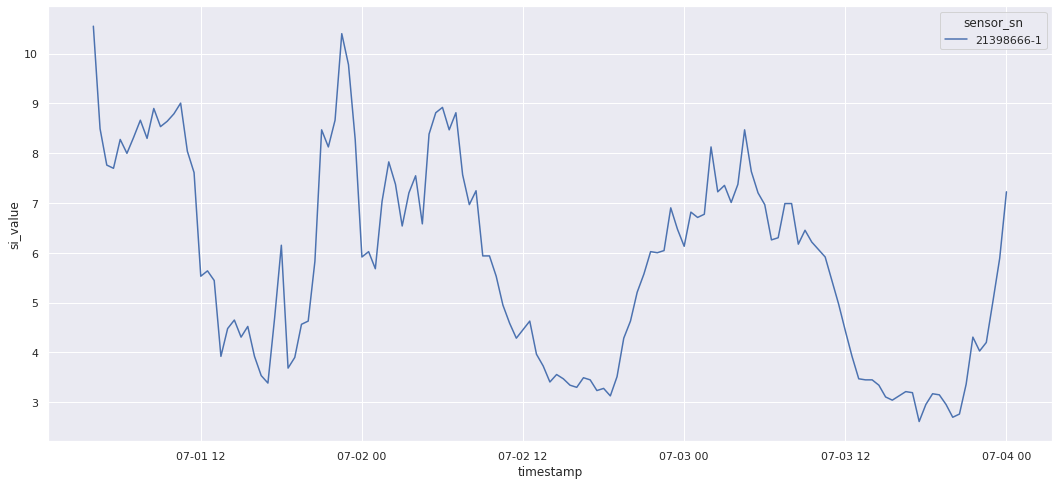

In [210]:
#
# Let's plot the humidity sensors in October
# We use:
# 'timestamp' column for timestamps of the timeseries
# 'si_value' where the sensor values are
# 'data' in the dataframe we generated above for October
# 
sns.lineplot(x='timestamp', y='si_value', hue='sensor_sn', data=df_temp)

Prepared by: LF Murillo (CC-BY) 07-04-2022